## Python ile CSV Dosyası Okuma  
Özet: Bu eğitimde, Python'da yerleşik csv modülünü kullanarak bir CSV dosyasını nasıl okuyacağınızı öğreneceksiniz.

### CSV Dosyası Nedir?  
CSV, "virgülle ayrılmış değerler" (Comma-Separated Values) anlamına gelir. Bir CSV dosyası, değerleri ayırmak için virgül kullanan bir sınırlı metin dosyasıdır.

Bir CSV dosyası bir veya birden fazla satırdan oluşur. Her satır bir veri kaydını temsil eder. Ve her veri kaydı, virgüllerle ayrılmış bir veya daha fazla değerden oluşur. Ayrıca, bir CSV dosyasındaki tüm satırlar aynı sayıda değere sahiptir.

Genellikle, bir CSV dosyası düz metin formatında tablo verilerini saklamak için kullanılır. CSV dosya formatı oldukça popülerdir ve Microsoft Excel, Google Spreadsheet gibi birçok yazılım uygulaması tarafından desteklenmektedir.

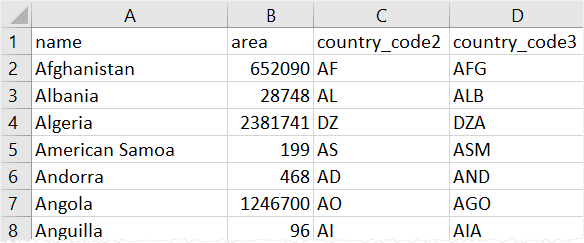

In [1]:
from IPython.display import Image

# Aynı dizindeki bir resmi görüntüleme
Image(filename="Python-Read-CSV-File.png")


Python'da CSV Dosyası Okuma  
Bir CSV dosyasını Python'da okumak için şu adımları izlersiniz:

### Adım 1: csv modülünü içeri aktarın:

```python
import csv
```

### Adım 2: CSV dosyasını okuma modunda yerleşik `open()` fonksiyonu ile açın:

```python
f = open('path/to/csv_file')
```

Eğer CSV dosyası UTF-8 karakterleri içeriyorsa, kodlama belirtmeniz gerekir:

```python
f = open('path/to/csv_file', encoding='UTF8')
```

### Adım 3: Dosya nesnesini (`f`) csv modülünün `reader()` fonksiyonuna iletin. `reader()` fonksiyonu bir CSV okuyucu nesnesi döndürecektir:

```python
csv_reader = csv.reader(f)
```

`csv_reader`, CSV dosyasındaki satırlardan oluşan bir iteratif nesnedir. Bu nedenle, CSV dosyasındaki satırlarda gezinmek için bir `for` döngüsü kullanabilirsiniz:

```python
for line in csv_reader:
    print(line)
```

Her satır bir değer listesi olarak gelir. Her değeri erişmek için köşeli parantez notasyonunu `[]` kullanırsınız. İlk değer 0 indeksine, ikinci değer 1 indeksine ve böyle devam eder.

Örneğin, belirli bir satırın ilk değerine erişmek için:

```python
line[0]
```

### Adım 4: Artık dosyayı kullanmadığınızda, dosya nesnesinin `close()` metodunu çağırarak dosyayı kapatın:

```python
f.close()
```

Ancak, `with` ifadesini kullanmak daha kolaydır, böylece `close()` metodunu manuel olarak çağırmanıza gerek kalmaz.

### Tüm adımları içeren örnek:

```python
import csv

with open('path/to/csv_file', 'r') as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        # her satırı işleme
        print(line)
```

### CSV Dosyası Okuma Örneği  
Örneğin, `country.csv` dosyasını kullanalım. Bu dosya, ülke adı, alan, 2 harfli ülke kodu, 3 harfli ülke kodu gibi bilgiler içeriyor.

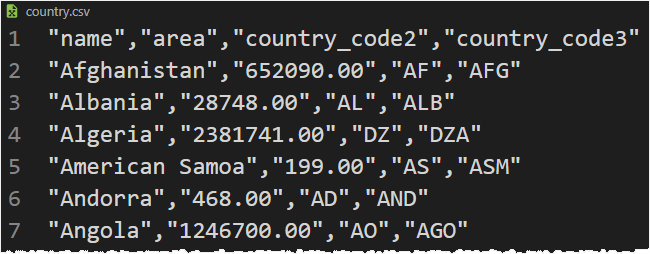

In [8]:
from IPython.display import Image

# Aynı dizindeki bir resmi görüntüleme
Image(filename="Python-Read-CSV-File-Example.png", width=500)

**country.csv Dosyasını İndirin**  
Aşağıda, `country.csv` dosyasını nasıl okuyacağınız ve her satırı ekrana nasıl yazdıracağınız gösterilmektedir:

```python
import csv

with open('country.csv', encoding="utf8") as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        print(line)
```

**Çıktı:**

```
['name', 'area', 'country_code2', 'country_code3']
['Afghanistan', '652090.00', 'AF', 'AFG']
['Albania', '28748.00', 'AL', 'ALB']
['Algeria', '2381741.00', 'DZ', 'DZA']
['American Samoa', '199.00', 'AS', 'ASM']
...
```

`country.csv` dosyasının ilk satırı başlıktır. Başlık ve veriyi ayırmak için `enumerate()` fonksiyonunu kullanarak her satırın indeksini alırsınız:

```python
import csv

with open('country.csv', encoding="utf8") as f:
    csv_reader = csv.reader(f)
    for line_no, line in enumerate(csv_reader, 1):
        if line_no == 1:
            print('Header:')
            print(line)  # başlık
            print('Data:')
        else:
            print(line)  # veri
```

Bu örnekte, `enumerate()` fonksiyonu kullanılarak ilk satırın indeksinin 1 olduğu belirtilmiştir.

Döngü içinde, `line_no` 1 olduğunda, satır başlıktır. Aksi takdirde, veri satırıdır.

Başlığı atlamak için `next()` fonksiyonunu kullanmanın başka bir yolu da şudur:

```python
import csv

with open('country.csv', encoding="utf8") as f:
    csv_reader = csv.reader(f)

    # ilk satırı atla
    next(csv_reader)

    # verileri göster
    for line in csv_reader:
        print(line)
```

Aşağıdaki kod, `country.csv` dosyasını okuyarak tüm ülkelerin toplam alanlarını hesaplar:

```python
import csv

total_area = 0

# tüm ülkelerin toplam alanını hesapla

with open('country.csv', encoding="utf8") as f:
    csv_reader = csv.reader(f)

    # başlığı atla
    next(csv_reader)

    # toplamı hesapla
    for line in csv_reader:
        total_area += float(line[1])

print(total_area)
```

**Çıktı:**

```
148956306.9
```

### `DictReader` Sınıfı Kullanarak CSV Dosyası Okuma  
`csv.reader()` fonksiyonunu kullandığınızda, CSV dosyasındaki değerleri köşeli parantez notasyonu ile erişebilirsiniz (örneğin, `line[0]`, `line[1]` vb.). Ancak, `csv.reader()` fonksiyonunun iki ana sınırlaması vardır:

1. CSV dosyasındaki değerleri erişme yolu çok açık değildir. Örneğin, `line[0]` dolaylı olarak ülke adını ifade eder. Ülke adını `line['country_name']` gibi erişmek daha anlamlı olur.
2. CSV dosyasındaki sütunların sırası değişirse veya yeni sütunlar eklenirse, doğru veriyi almak için kodu değiştirmeniz gerekir.

İşte burada `DictReader` sınıfı devreye girer. `DictReader` sınıfı, her satırın bilgisini bir sözlüğe (dict) haritalar. Sözlüğün anahtarları, ilk satırdaki değerlerle belirtilir.

`DictReader` sınıfını kullanarak, `country.csv` dosyasındaki verilere şu şekilde erişebilirsiniz: `line['name']`, `line['area']`, `line['country_code2']`, `line['country_code3']`.

Aşağıdaki örnek, `DictReader` sınıfını kullanarak `country.csv` dosyasını okumaktadır:

```python
import csv

with open('country.csv', encoding="utf8") as f:
    csv_reader = csv.DictReader(f)
    # başlığı atla
    next(csv_reader)
    # verileri göster
    for line in csv_reader:
        print(f"{line['name']} ülkesinin alanı {line['area']} km2")
```

**Çıktı:**

```
Afganistan ülkesinin alanı 652090.00 km2
Arnavutluk ülkesinin alanı 28748.00 km2
Cezayir ülkesinin alanı 2381741.00 km2
...
```

Eğer ilk satırdaki adları değiştirmek isterseniz, bunu `DictReader()` yapıcısına bir alan adı listesi ile açıkça belirtebilirsiniz:

```python
import csv

fieldnames = ['country_name', 'area', 'code2', 'code3']

with open('country.csv', encoding="utf8") as f:
    csv_reader = csv.DictReader(f, fieldnames)
    next(csv_reader)
    for line in csv_reader:
        print(f"{line['country_name']} ülkesinin alanı {line['area']} km2")
```

Bu örnekte, ilk satırdaki değerleri alan adı olarak kullanmak yerine, alan adı listesini açıkça `DictReader` yapıcısına geçiriyoruz.

**Özet**  
CSV dosyasından veri okumak için `csv.reader()` fonksiyonunu veya `csv.DictReader` sınıfını kullanın.